In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
init_notebook_mode(connected = True)
cf.go_offline()
import plotly.express as px

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [7]:
df['stringency_index']

0         8.33
1         8.33
2         8.33
3         8.33
4         8.33
          ... 
106146     NaN
106147     NaN
106148     NaN
106149     NaN
106150     NaN
Name: stringency_index, Length: 106151, dtype: float64

<h1>This is our data set</h1>
#you can write in html in markdown cells
#this makes it possible to export it as html

In [8]:
all_countries = list(df['location'].unique())  #all countries in dataset
all_countries

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [194]:
def basic_info(*isos):  #this produces a total deaths graph and a new cases graph for the countries you pass in for the past month
    
    for iso in isos:
        
        #TO BE USED BY BOTH GRAPHS
        
        
        sns.set_style('whitegrid')  #dark background
        country_name = df[df['iso_code']==iso]['location'].iloc[0]  #this brings the df where the iso code is the one u have entered and then brings the location associated with it. 
         #.iloc[0] just brings the location name rather than a list of the location name repeated 1000 times
      
        df_country = df[df['iso_code']==iso].tail(30) #this builds the df we are going to use. its the data from the country entered from the past 7 days.
        dates = df_country['date']   #the list of dates that will be plotted on x axis

        
        #THE NEW CASES GRAPH
        
        new_cases = df_country['new_cases']
      
        plt.figure(figsize =(10,5))  
      
        fig1 = sns.lineplot('date','new_cases', data = df_country, color = 'red', marker = 'o', markersize = 10)  #plots the new cases against the date (from past week). uses data from df_country
      
        fig1.set_xticks(np.arange(1,31,5))   #evenly spaced values between 1st and last day
         
        plt.xlim(xmin = dates.iloc[0])  #first date is  at origin
        plt.ylim(ymin = (new_cases.min()) * 0.95, ymax = (new_cases.max()  * 1.05))  #the min and max are multiplied by 0.9 and 1.1 respectively so the graph has leeway - > no points ON axes
      
        plt.title(f'{country_name} New Cases: Last 30 days') #title of graph uses country name, defined above
      
        plt.xlabel('Date')
        plt.ylabel('New Cases')
            
    
    
        #THE TOTAL DEATHS GRAPH
        
        #total_deaths = df_country['total_deaths']
      
 #       plt.figure(figsize = (10,5))  #new figure, same size
  #      plt.title(f'{country_name} Total Death Count')
   #   
    #    fig2 = sns.lineplot('date', 'total_deaths', data = df_country, marker = 'v', markersize = 10, color = 'blue' )
     #   fig2.set_xticks(np.arange(1,31,5))
      #
       # plt.xlim(xmin = dates.iloc[0])
        #plt.ylim(ymin = total_deaths.min() * 0.999 , ymax = total_deaths.max() * 1.001)
    #
      
     #   plt.xlabel('Date')
      #  plt.ylabel('Total Deaths')
      
      
      
        plt.tight_layout() #neatens layout
        
        
        plt.savefig('testIMG')   #this line may cause issues. Temporary line

        

 


C:\Users\dnilf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



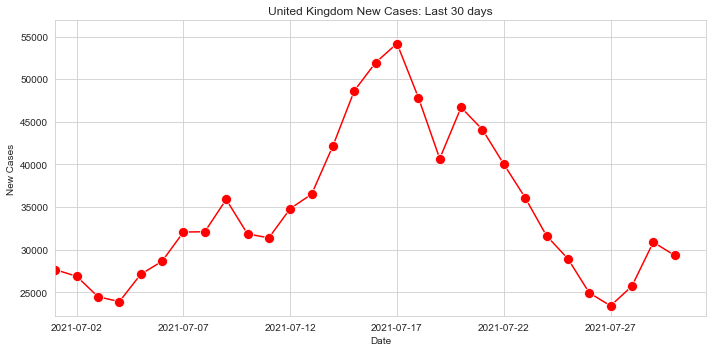

In [195]:
basic_info('GBR')

In [182]:


def country_compare_death_rate(iso1, iso2, days = 30): #3rd param is optional- can choose timeline of graph
    
    #CREATING A DATAFRAME WHERE IT CONTAINS DATA FROM BOTH COUNTRIES OVER THE PAST 7 DAYS

    df_iso1 = df[df['iso_code']==iso1].tail(days)
    country_1 = df_iso1['location'].iloc[0]   #just grabbing the location name
    
    df_iso2 = df[df['iso_code']==iso2].tail(days)
    country_2 = df_iso2['location'].iloc[0]   
    

    df_both = df_iso1.append(df_iso2)
    
    
    
    #PLOTTING GRAPH OF NEW DEATHS OF BOTH COUNTRIES
    plt.figure(figsize= (10,5))
    sns.set_style('whitegrid')
    
 
    sns.lineplot('date','new_deaths', data = df_both, hue = 'location')

    plt.xticks(np.arange(0,31,4))
    
    plt.xlim(xmin = df_both['date'].iloc[0])  #first date at #origin
    plt.ylim(ymin = 0)  #y axis starts from 0
    plt.xlabel('Date')
    plt.ylabel('New Deaths')
    plt.title(f'Death rate (past {days} days)')
    plt.legend([f'{country_1}',f'{country_2}'], loc = 'best', fontsize = 'large', shadow = True)
    
    
    


In [190]:
country_compare_death_rate('GBR','IRN')

In [185]:
#exact same function as before but replaced deaths per day with new cases
def country_compare_case_rate(iso1, iso2, days = 30): #3rd param is optional- can choose timeline of graph
    
    

    df_iso1 = df[df['iso_code']==iso1].tail(days)
    country_1 = df_iso1['location'].iloc[0]   #just grabbing the location name
    
    df_iso2 = df[df['iso_code']==iso2].tail(days)
    country_2 = df_iso2['location'].iloc[0]   
    

    df_both = df_iso1.append(df_iso2)
    
    
    
 
    plt.figure(figsize= (10,5))
    sns.set_style('whitegrid')
    
 
    sns.lineplot('date','new_cases', data = df_both, hue = 'location', palette = )

    plt.xticks(np.arange(0,31,4))
    
    plt.xlim(xmin = df_both['date'].iloc[0])  #first date at #origin
    plt.ylim(ymin = 0)  #y axis starts from 0
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.title(f'Case rate (past {days} days)')
    plt.legend([f'{country_1}',f'{country_2}'], loc = 'best', fontsize = 'large', shadow = True)


C:\Users\dnilf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



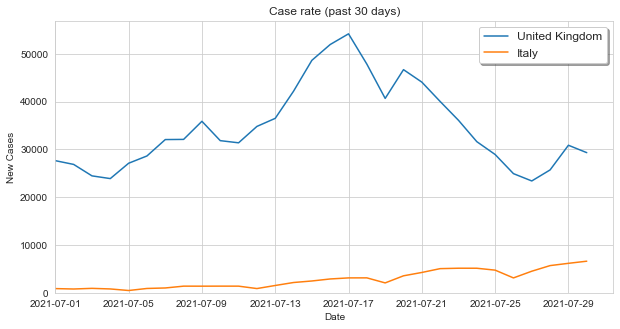

In [186]:
country_compare_case_rate('GBR','ITA')

In [65]:
#how can we make the death rate plot interactive?

In [15]:
def icountry_compare(iso1, iso2, days = 30):  #again, 3rd param is optional - timeline choice
    
    country_1 = df[df['iso_code']==iso1]['location'].iloc[0]
    df_iso1 = df[df['iso_code']==iso1].tail(days)[['date','new_deaths']] #df w date and new deaths
 
    df_iso2 = df[df['iso_code']==iso2].tail(days)[['date','new_deaths']]
    country_2 = df[df['iso_code']==iso2]['location'].iloc[0]

    df_iso1new = df_iso1.set_index('date')
    df_iso2new = df_iso2.set_index('date') #dataframes where date is index. makes it possible to concat them

    df_both = pd.concat([df_iso1new, df_iso2new], axis = 1) #concatenating dfs
    df_both.columns  = [f'{country_1}',f'{country_2}']
    
    
    
    df_both.iplot(title = f'New Deaths per day- {country_1}, {country_2} (past {days} days)', color = ['orange','navy'])
  
  


In [16]:
icountry_compare('ITA','GBR')

In [17]:
#we want a table with one row for each country- the last available date.
#this will make it easy to access the latest data and also won't bring up loads of rows when u search for one country
#we can make an empty dataframe and append a row from each country to it, one by one with a for loop
#so lets get all column names first
all_cols = list(df.columns)

#now we need to make an empty dataframe with these columns
df_comp = pd.DataFrame(columns = all_cols)
df_comp  #df compact

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality


In [18]:
df_comp['iso_code']

Series([], Name: iso_code, dtype: object)

In [19]:
#first we need to drop 'international' and 'world' from  our dataframe. we may use these later

In [20]:
df_no_inter = df[df['location'] !='International']
df_no_inter = df_no_inter[df_no_inter['location'] != 'World']
df_no_inter

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106146,ZWE,Africa,Zimbabwe,2021-07-26,99944.0,2050.0,2030.286,3173.0,79.0,68.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
106147,ZWE,Africa,Zimbabwe,2021-07-27,101711.0,1767.0,1899.429,3280.0,107.0,76.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
106148,ZWE,Africa,Zimbabwe,2021-07-28,103567.0,1856.0,1778.143,3340.0,60.0,75.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
106149,ZWE,Africa,Zimbabwe,2021-07-29,105656.0,2089.0,1747.857,3421.0,81.0,78.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [21]:
#now we only have singular country names.

In [22]:
#now lets use a for loop to append all of the countries, but only one row from each- the most recent

In [23]:
#all_countries is a list of all countries
for country in all_countries:
    df_comp = df_comp.append(df_no_inter[df_no_inter['location']==country].iloc[-1:])
       

In [24]:
df_comp

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
522,AFG,Asia,Afghanistan,2021-07-30,146523.0,527.0,440.571,6677.0,62.0,45.714,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
1056,OWID_AFR,NaN,Africa,2021-07-30,6673032.0,42968.0,39040.000,169216.0,800.0,974.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578,ALB,Europe,Albania,2021-07-30,133036.0,37.0,29.714,2457.0,0.0,0.143,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
2100,DZA,Africa,Algeria,2021-07-30,170189.0,1521.0,1518.000,4219.0,30.0,27.571,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN
2616,AND,Europe,Andorra,2021-07-30,14678.0,23.0,25.714,128.0,1.0,0.143,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103999,VNM,Asia,Vietnam,2021-07-30,141122.0,7717.0,7737.857,1161.0,139.0,113.000,...,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704,NaN
104119,WLF,Oceania,Wallis and Futuna,2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
105152,YEM,Asia,Yemen,2021-07-30,7058.0,16.0,7.857,1375.0,1.0,0.429,...,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470,NaN
105652,ZMB,Africa,Zambia,2021-07-30,195096.0,956.0,640.143,3376.0,21.0,22.143,...,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584,NaN


In [25]:
df_diab  = df_comp[['diabetes_prevalence','total_cases_per_million','location','total_cases',
                    'total_deaths','gdp_per_capita','handwashing_facilities','continent','hospital_beds_per_thousand',
                    'aged_70_older','male_smokers','female_smokers','cardiovasc_death_rate', 'stringency_index', 'population_density',
                     'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'population',
                    'median_age', 'total_deaths_per_million']]
df_diab = df_diab[df_diab['diabetes_prevalence'].notna()]
df_diab = df_diab[df_diab['gdp_per_capita'].notna()]
df_diab = df_diab[df_diab['total_deaths'].notna()]
df_diab =  df_diab[df_diab['hospital_beds_per_thousand'].notna()]
df_diab =  df_diab[df_diab['aged_70_older'].notna()]

In [26]:
#contents

#i) first we observe some key patterns (and lack of patterns) in global data

#ii) europe vs africa study

#iii) effectiveness of lockdown - stringency index and effect of population density

#iv) virus' impact on global economy

In [27]:
#before we start, we should observe this graph 

In [28]:
fig = go.Figure()

fig = px.scatter(df_diab, x = 'total_cases', y = 'total_deaths', size = 'total_deaths_per_million', trendline = 'ols', 
                 hover_name = 'location', color = 'continent')
fig.update_layout(xaxis_type = 'log', yaxis_type = 'log')
fig.update_layout(
    width = 1200,
    height = 650,
    title = 'deaths against cases, size is deaths per million'
    )
fig.show()

In [29]:
#clearly countries with higher number of cases and higher deaths also have high deaths per million
#i.e., no countries have relatively few deaths but a very high number of deaths per million.
#this would be shown by a bigger circle towards the bottom, which isn't seen in the graph

#are the countries with big  circles NOT at the v top really the ones to blame, rather than high case countries?
#what about countries with many but actually few per million- don't they deserve more credit? e.g., india, a small circle at top

In [30]:
df_diab['stringency_index']

522      NaN
1578     NaN
2100     NaN
3789     NaN
4366     NaN
          ..
103444   NaN
103999   NaN
105152   NaN
105652   NaN
106150   NaN
Name: stringency_index, Length: 155, dtype: float64

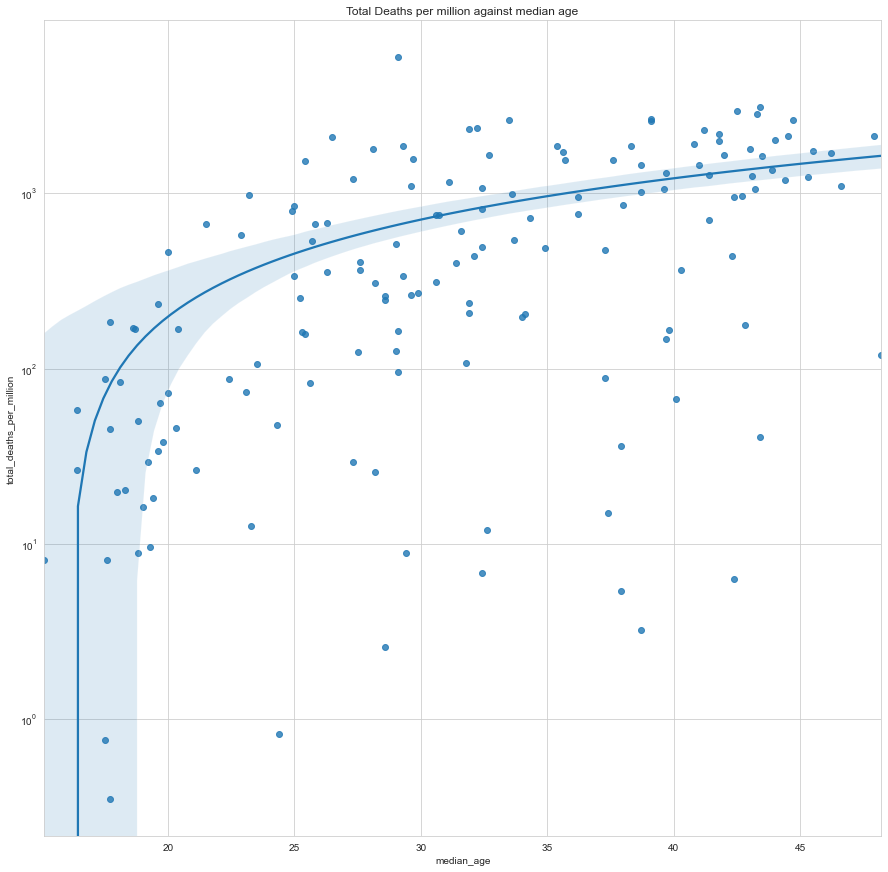

In [32]:
fig = plt.figure(figsize = (15,15))
ax = sns.regplot(x = 'median_age', y = 'total_deaths_per_million', data = df_diab)

ax.set_yscale('log')
plt.title('Total Deaths per million against median age')
plt.show()

In [33]:
#clear positive trend, especially from younger to middle aged

In [34]:
fig = go.Figure()

fig = px.scatter(df_diab, x = 'median_age', y = 'total_deaths_per_million', trendline = 'ols', 
                 size = 'hospital_beds_per_thousand', hover_name = 'location')
fig.update_layout( yaxis_type = 'log')
fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()

In [35]:
fig = go.Figure()

fig = px.scatter(df_diab, x = 'median_age', y = 'total_deaths_per_million', trendline = 'ols', size = 'diabetes_prevalence',
                 hover_name = 'location', color = 'continent')
fig.update_layout(yaxis_type = 'log')
fig.update_layout(
    width = 1000,
    height = 600,
    title = 'deaths per mil against median age, size is diabetes'
    )
fig.show()

In [36]:
#with all continents (except asia it seems), there seems to be a  positive correlation between median age and deaths/thousand
#however, diabetes does not seem to be a DETERMINING factor as bubbles of all sizes seem to be all across the graph
#lets analyse diabetes  in further detail rather than just a visual analysis
#european countries and south american countries seem to have been hit worst with the highest lines. 
#european countries all have very high median ages too
#we will analyse Europe and Africa in greater detail later

In [37]:
fig = go.Figure()

fig = px.scatter(df_diab, x = 'diabetes_prevalence',
                 y = 'total_deaths_per_million', trendline = 'ols', 
                 hover_name = 'location')
fig.update_layout( yaxis_type = 'log')
fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()

In [38]:
#in fact, the line is downward sloping. diabetes isn't as determining a factor as old age. 
#semi-log graph used here. one axis logarithmic, one linear
#R^2 value VERY low though. points scatterred all over the place

In [39]:
fig = go.Figure()

fig = px.scatter(df_diab, x = 'cardiovasc_death_rate', y = 'total_deaths_per_million', trendline = 'ols',
                 hover_name = 'location', size = 'hospital_beds_per_thousand')
fig.update_layout( yaxis_type = 'log')
fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()

In [40]:
#countries with a LOWER cardiovasc death rate are getting MORE deaths per million? bizarre
#we'd expect more beds to lead to less deaths. clearly this has not been the case as we have small circles below and under the line
#we saw a seemingly low correlation between more beds and less deaths earlier too. we can examine that further here

In [41]:
fig = go.Figure()

fig = px.scatter(df_diab, x = 'hospital_beds_per_thousand', y = 'total_deaths_per_million', trendline = 'ols',
                 hover_name = 'location')
fig.update_layout( yaxis_type = 'log')
fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()

In [42]:
#very slight incline, very low R^2 value. minimal correlation

In [43]:
#this data begs the question - have richer countries dealt with the virus worse?
#to examine this, lets consider Europe and Africa, the contnents with the highest and lowest average gdp per capita
#respectively

#EUROPE AND AFRICA STUDY

In [44]:
df_diab_af_eur = df_comp[df_comp['continent']=='Europe']
df_diab_af_eur = df_diab_af_eur.append(df_comp[df_comp['continent']=='Africa'])

df_diab_af = df_diab_af_eur[df_diab_af_eur['continent']=='Africa']
df_diab_eur = df_diab_af_eur[df_diab_af_eur['continent']=='Europe']


Text(0.5, 1.0, 'GDP per capita of the continents')

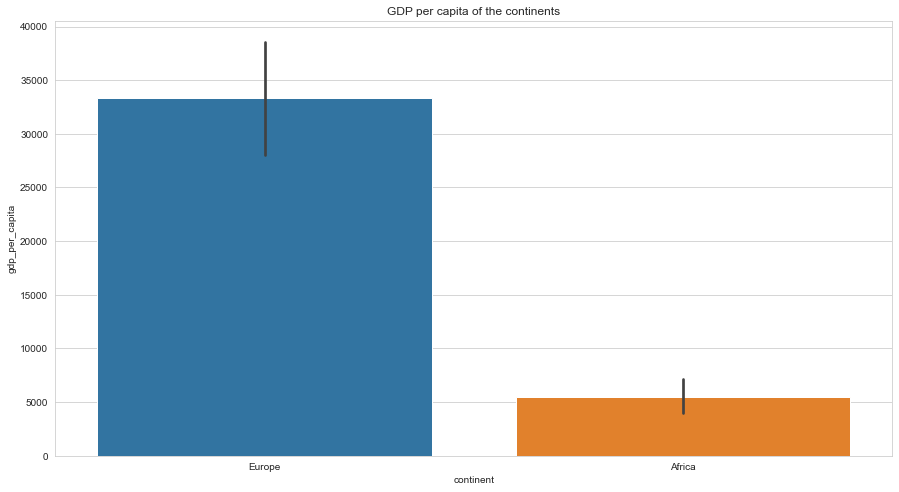

In [45]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'continent', y= 'gdp_per_capita',data = df_diab_af_eur) 
plt.title('GDP per capita of the continents')

In [46]:
#black lines represents standard deviation
#by defualt, when whole continents are plotted, the mean of all countries in the continent is plotted

In [47]:
fig = px.bar(df_diab_af_eur, x="continent", y="gdp_per_capita",
             color='location', barmode = 'group',
             height=700)
fig.show()

In [48]:
#another nice graph allowing us to examine individual countries

In [49]:
#this graph is similar, but the countries within each continent are stacked on top of each other. it's a nice summary
fig = px.bar(df_diab_af_eur, x="continent", y="gdp_per_capita",
             color='location', 
             height=400)
fig.show()

Text(0.5, 1.0, 'spread of deaths per million for each continent')

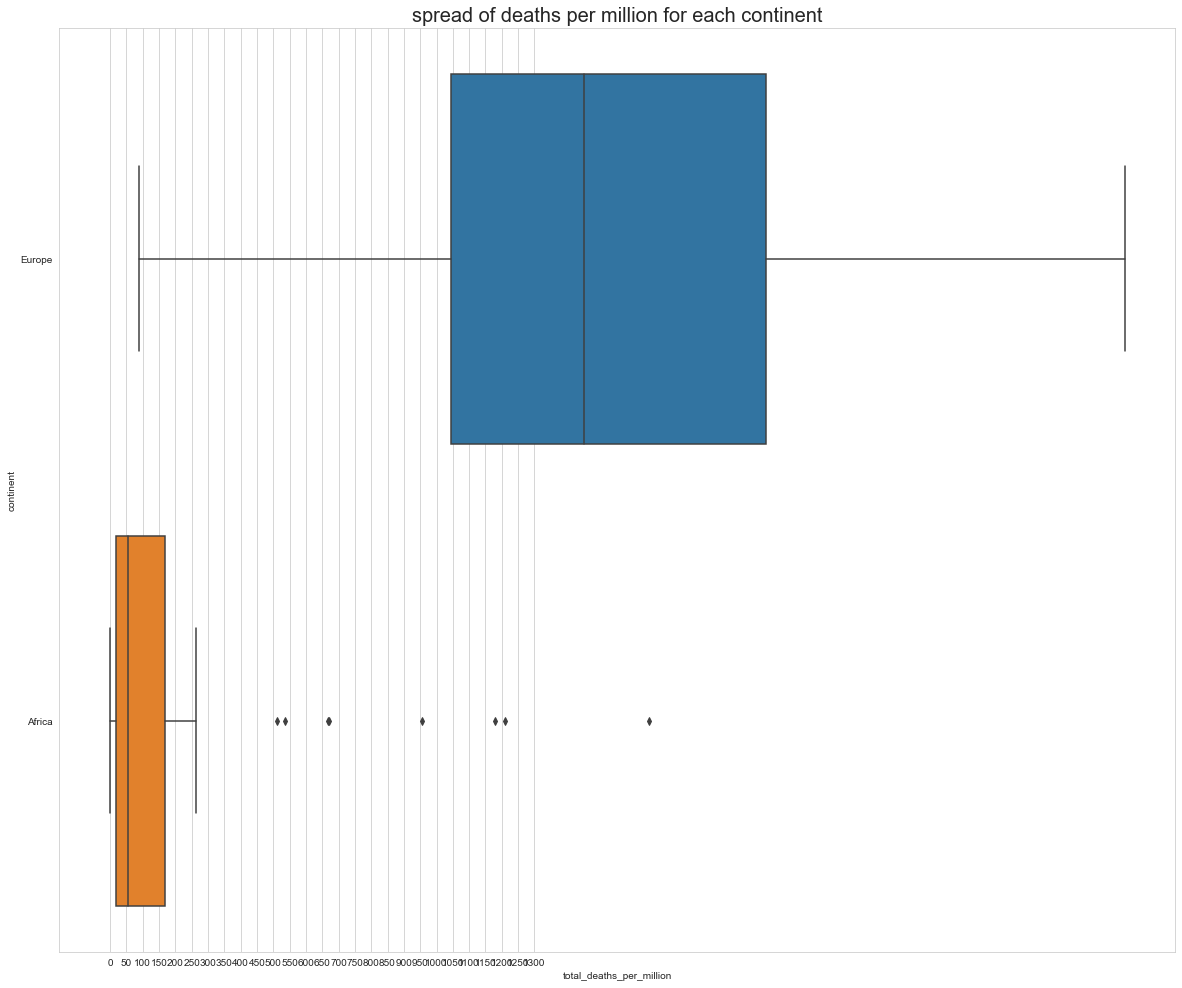

In [50]:
fig = plt.figure(figsize = (20,17))
ax = sns.boxplot(y = 'continent', x = 'total_deaths_per_million', data = df_diab_af_eur, orient = 'h')
ax.set_xticks(np.arange(0,1350, 50))
plt.title('spread of deaths per million for each continent', fontsize =20)

In [51]:
#black dots are countries that lie ABOVE IQR + 1.5std
#median of africa is not visible here- it is 6.4 (1dp)


#huge spread of deaths per million in europe, but all deaths are concentrated at bottom for africa
#africa has a much smaller IQR: 10.872 , compared to europes IQR of 196.666
#africa std = 26, europe std = 256 (both figures rounded to nearest whole number)
#this point isemphasised by the fact that we have plotted 51 European countries and 55 african


Text(0.5, 1.0, 'spread of cases per million for each continent')

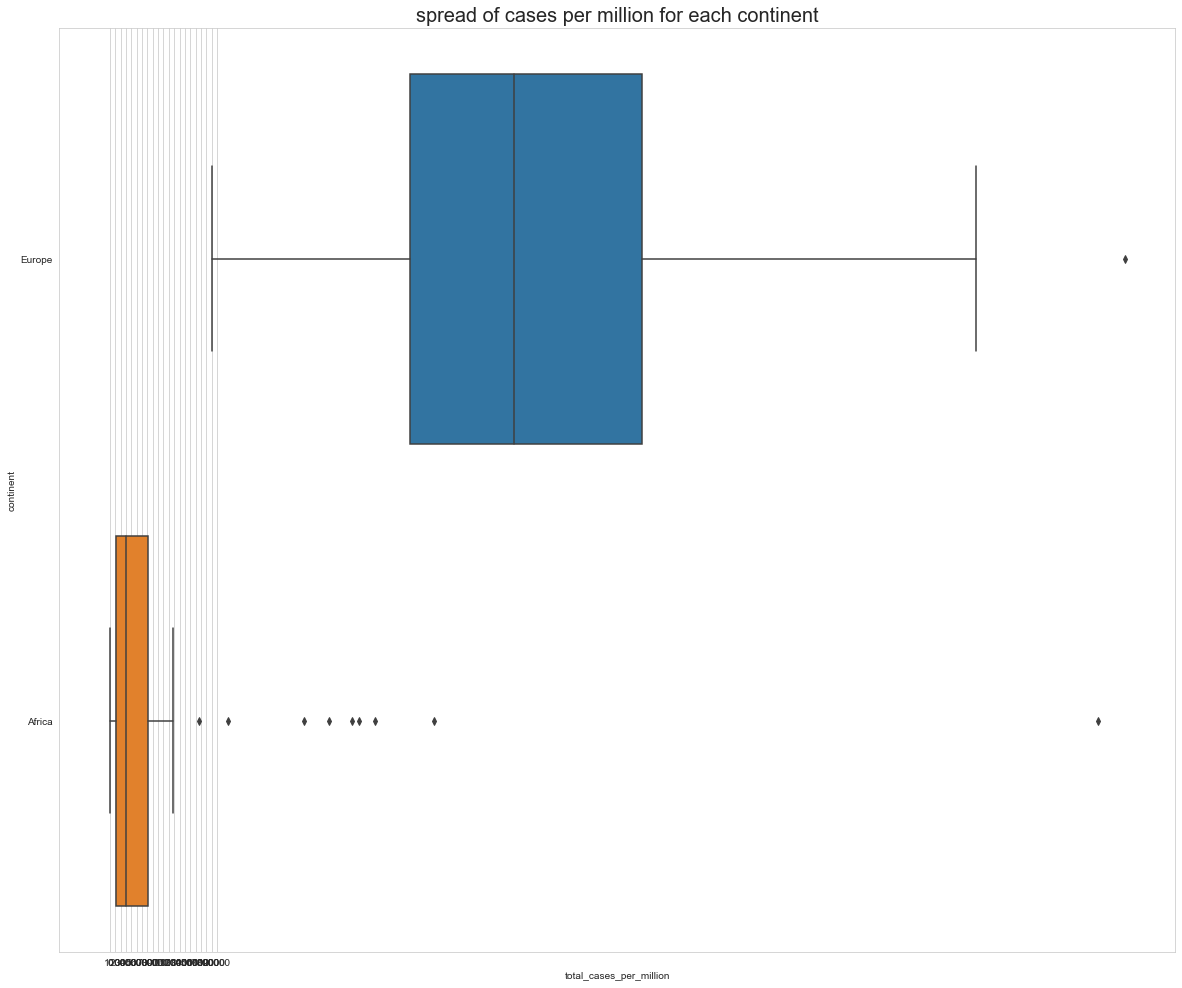

In [52]:
fig = plt.figure(figsize = (20,17))
ax = sns.boxplot(y = 'continent', x = 'total_cases_per_million', data = df_diab_af_eur, orient = 'h')
ax.set_xticks(np.arange(0,20100, 1000))
plt.title('spread of cases per million for each continent', fontsize = 20)

In [54]:
#can we see gdp and death spread on one graph?

In [56]:
#now we are ready to start looking at HOW this has happenned.

In [57]:
#constructing a separate dataframe that we can use for our bar chart. atm, male and female smokers are in two separate
#columns but we want them in one column so we can use gender as a hue in our graph

df_af_eur_smo_male = df_diab_af_eur[['male_smokers','continent','location']]
df_af_eur_smo_male['male or female'] = 'male'
df_af_eur_smo_male.rename(columns={'male_smokers': 'smoking rate'}, inplace = True)

df_af_eur_smo_female = df_diab_af_eur[['female_smokers','continent','location']]
df_af_eur_smo_female['male or female'] = 'female'
df_af_eur_smo_female.rename(columns={'female_smokers': 'smoking rate'}, inplace = True)

df_af_eur_smo = df_af_eur_smo_male.append(df_af_eur_smo_female)

#CONSIDER USING PLOTLY HERE. see the documentation for barcharts for a much easier way

<AxesSubplot:xlabel='continent', ylabel='smoking rate'>

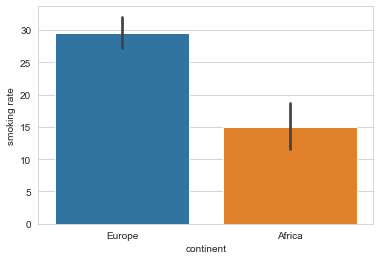

In [58]:
sns.barplot(x = 'continent', y = 'smoking rate', data = df_af_eur_smo)

<AxesSubplot:xlabel='continent', ylabel='smoking rate'>

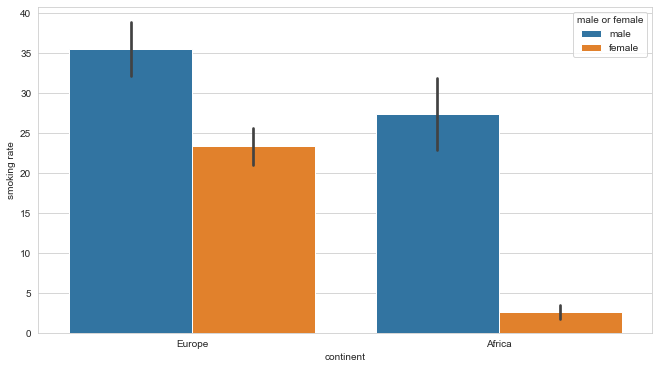

In [59]:
plt.figure(figsize = (11,6))
sns.barplot(x = 'continent', y = 'smoking rate', data = df_af_eur_smo, hue = 'male or female')

In [60]:
df_diab_af_eur['smoking average'] = (df_diab_af_eur['male_smokers'] + df_diab_af_eur['female_smokers'])/2

In [61]:
fig = px.bar(df_diab_af_eur, x="continent", y="smoking average",
             color = 'location', barmode = 'group',
             height=700)
fig.show()

In [62]:
#for this interactive plot, we used our original dataframe for africa and europe bc we weren't sorting by sex - 
#we used average of male and female smokers

In [63]:
#clearly more smokers in europe:
#1 more people can afford them? is that the tie with gdp?
#2 can we then see if this links to cardiovascular health?

<AxesSubplot:xlabel='continent', ylabel='extreme_poverty'>

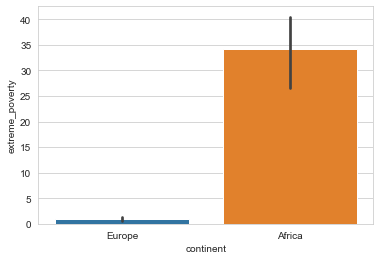

In [64]:
#1: poverty
sns.barplot(x = 'continent', y = 'extreme_poverty', data = df_diab_af_eur)

In [65]:
fig = px.bar(df_diab_af_eur, x="continent", y="extreme_poverty",
             color='location', barmode = 'group',
             height=700)
fig.show()

In [66]:
#ridiculously huge difference in poverty. -> less money to buy cigarettes? but unhealthier foods, access to healthcare,
#unclean living conditions etc

<AxesSubplot:xlabel='continent', ylabel='cardiovasc_death_rate'>

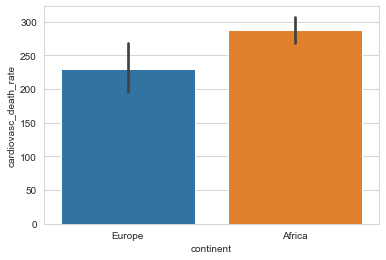

In [67]:
#2: link to cardiovascular health?
sns.barplot(x = 'continent',y =  'cardiovasc_death_rate', data = df_diab_af_eur)

In [68]:
#the low gdp per capita implies lower living standards and reduced access to higher quality and perhaps healthier food
#since smoking is still higher in europe and so are deaths, cardiovascular health doesn't seem to play a huge role.
#and if it did, the bars here are not too far apart, especially when considering the larger std of european data.

Text(0.5, 1.0, 'handwashing facilities for each continent')

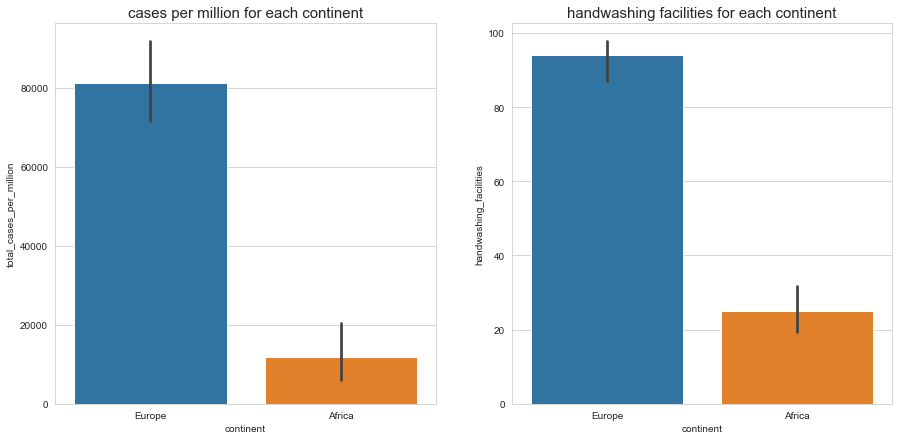

In [69]:
f, axes = plt.subplots(1, 2)

f.set_figheight(7)
f.set_figwidth(15)
ax1 = sns.barplot(x = 'continent',y =  'total_cases_per_million', data = df_diab_af_eur, ax = axes[0])
ax1.set_title('cases per million for each continent', fontsize= 15)
ax2 = sns.barplot(x = 'continent',y =  'handwashing_facilities', data = df_diab_af_eur, ax = axes[1])
ax2.set_title('handwashing facilities for each continent', fontsize = 15)

#we are considering cases per million rather than deaths here as handwashing facilities have been widely promoted as
#reducing spread of virus

In [70]:
#clearly not a direct factor. these graphs seem to j be like this bc richer countries have better handwashing facilites,
#but we have already shown that richer countries have bigger factors(higher gdp -> more tobacco, higher pop dens)
#that have given them a worse experience of the pandemic

<AxesSubplot:xlabel='continent', ylabel='population_density'>

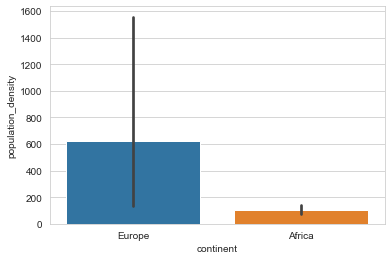

In [71]:
sns.barplot(x = 'continent', y = 'population_density', data = df_diab_af_eur)

In [72]:
#europe has a huge standard deviation? lets filter by country to see why

In [73]:
fig = px.bar(df_diab_af_eur, x="continent", y="population_density",
             color='location', barmode = 'group',
             height=700)
fig.show()

In [74]:
#this shows that the 'average' bar chart doesn't help bc europe has 2 countries boosting the rest significantly
#we can consider the medians of each country instead since the median is not affected much by extreme values.

In [75]:
df_diab_af_eur[df_diab_af_eur['continent']=='Europe']['population_density'].describe()
df_diab_af_eur[df_diab_af_eur['continent']=='Africa']['population_density'].describe()

count     53.000000
mean     103.492453
std      129.747397
min        3.078000
25%       23.500000
50%       64.699000
75%      104.957000
max      622.962000
Name: population_density, dtype: float64

In [76]:
#median for europe population density = 107.396
#median for africa population density = 64.699

In [77]:
df_diab_eur['population_density_median'] = df_diab_af_eur[df_diab_af_eur['continent']=='Europe']['population_density'].median()
df_diab_af['population_density_median'] = df_diab_af_eur[df_diab_af_eur['continent']=='Africa']['population_density'].median()

In [78]:
#append them again. becomes the same dataframe just with medians of pop density
df_diab_af_eur =  df_diab_eur.append(df_diab_af)

In [79]:
df_diab_af_eur

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,population_density_median
1578,ALB,Europe,Albania,2021-07-30,133036.0,37.0,29.714,2457.0,0.0,0.143,...,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN,107.396
2616,AND,Europe,Andorra,2021-07-30,14678.0,23.0,25.714,128.0,1.0,0.143,...,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN,107.396
6637,AUT,Europe,Austria,2021-07-30,658518.0,514.0,418.429,10737.0,0.0,1.000,...,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922,NaN,107.396
9714,BLR,Europe,Belarus,2021-07-30,445048.0,1184.0,897.286,3445.0,11.0,9.857,...,443.129,5.18,10.5,46.1,NaN,11.00,74.79,0.823,NaN,107.396
10257,BEL,Europe,Belgium,2021-07-30,1124715.0,1764.0,1793.429,25241.0,6.0,3.429,...,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.931,NaN,107.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96623,TGO,Africa,Togo,2021-07-30,15624.0,102.0,93.429,152.0,2.0,1.286,...,280.033,6.15,0.9,14.2,10.475,0.70,61.04,0.515,NaN,64.699
97740,TUN,Africa,Tunisia,2021-07-30,586146.0,3508.0,3977.143,19503.0,167.0,207.286,...,318.991,8.52,1.1,65.8,78.687,2.30,76.70,0.740,NaN,64.699
98990,UGA,Africa,Uganda,2021-07-30,93675.0,393.0,280.714,2661.0,29.0,23.571,...,213.333,2.50,3.4,16.7,21.222,0.50,63.37,0.544,NaN,64.699
105652,ZMB,Africa,Zambia,2021-07-30,195096.0,956.0,640.143,3376.0,21.0,22.143,...,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584,NaN,64.699


<AxesSubplot:xlabel='continent', ylabel='population_density_median'>

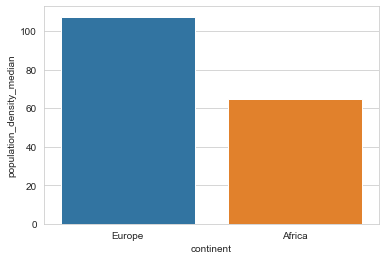

In [80]:
sns.barplot(x = 'continent', y = 'population_density_median', data = df_diab_af_eur)

In [81]:
#population density then, another factor that has contributed to europes higher case + death rate?

In [82]:
fig = go.Figure()

fig = px.scatter(df_diab_af_eur, x = 'population_density', y = 'total_cases_per_million', trendline = 'ols', 
                 hover_name = 'location', color = 'continent')
fig.update_layout( xaxis_type = 'log', yaxis_type = 'log')
fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()

In [83]:
#most purple points situated above and to the right of most red points

#but also, if we examine this graph, the line is flat for europe, even decreasing for africa
#and R^2 value is v low. perhaps lockdown retrictions imposed are far more important than actual population density?
#examine that next?
#we will examine this globally

In [84]:
df_str = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

C:\Users\dnilf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.



In [85]:
stringency_countries = np.array(df_str['CountryName'].unique())

In [86]:
df_str['CountryName'].nunique()
#185 countries have stringency index. some may be NaN values though

186

In [87]:
#the stringency index values for each countryARE there but hidden in dataset.
#theyre different for each date! we will consider the maximum for the following reason:
#two countries who have different spreads of stringency index cld have the same mean and this wldnt tell us anything about 
#the impact of the SEVERITY of lockdown

In [88]:
df_temp = df_str[['CountryName','StringencyIndex']]  #temporary dataframe we will use to construct our new dataframe with maximum stringency values
df_temp

,CountryName,StringencyIndex
0,Aruba,0.0
1,Aruba,0.0
2,Aruba,0.0
3,Aruba,0.0
4,Aruba,0.0
...,...,...
180331,Zimbabwe,NaN
180332,Zimbabwe,NaN
180333,Zimbabwe,NaN
180334,Zimbabwe,NaN


In [89]:
#for each country, there are different stringency values for different dates
#with this 'for' loop we create a dataframe with the MAXIMUM stringency value of each country since the start of the dataset

starting_df = df_temp[df_temp['CountryName'] =='Aruba']
starting_df = starting_df[starting_df['StringencyIndex'] ==  df_temp[df_temp['CountryName']=='Aruba']['StringencyIndex'].max()]
starting_df = starting_df.drop_duplicates()
 
#the reason for the starting df is simply to have SOMETHING to append data to- we cannot append data to an empty dataframe
    
for country in stringency_countries:
   
     
    temp = df_temp[df_temp['CountryName'] ==country]
    temp = temp[temp['StringencyIndex'] ==  df_temp[df_temp['CountryName']==country]['StringencyIndex'].max()]
    temp = temp.drop_duplicates()
    
    #here, we locate the rows where stringency index is at the country's max and grab one of them by removing duplicates
    
    starting_df = starting_df.append(temp)
    #on every iteration, we add a new country's row to the dataframe


In [90]:
starting_df
#as seen we have two 'Aruba' values at the top. we can remove them as such:

,CountryName,StringencyIndex
100,Aruba,88.89
100,Aruba,88.89
680,Afghanistan,84.26
1242,Angola,90.74
1842,Albania,89.81
...,...,...
177531,Vanuatu,83.33
178144,Yemen,58.33
178687,South Africa,87.96
179302,Zambia,70.83


In [91]:
df_stringency = starting_df.drop_duplicates()
df_stringency

,CountryName,StringencyIndex
100,Aruba,88.89
680,Afghanistan,84.26
1242,Angola,90.74
1842,Albania,89.81
2795,Andorra,65.74
...,...,...
177531,Vanuatu,83.33
178144,Yemen,58.33
178687,South Africa,87.96
179302,Zambia,70.83


In [92]:
#so now we have all our countries with maximum values

In [93]:
df_stringency.columns = 'location','Stringency Index Max'

df_stringency.sort_values('location', inplace = True)

df_stringency


#now its sorted alphabetically and has more appropriate column names
#can we get this stringency index max data back into df_comp even tho the countries don't all align

,location,Stringency Index Max
680,Afghanistan,84.26
1842,Albania,89.81
69464,Algeria,92.13
2795,Andorra,65.74
1242,Angola,90.74
...,...,...
176081,Venezuela,90.74
176959,Vietnam,96.30
178144,Yemen,58.33
179302,Zambia,70.83


In [94]:
# for graphing purposes we would like them to be sorted by continent so lets do that.
# we also want to align the data set with the original df comp to get deaths, cases etc for eaach country
# it is easier to do this in one big step

In [95]:
l = list(pd.concat([df_comp['location'], df_stringency['location']]).drop_duplicates(keep = False))
#countries that aren't in BOTH stringency and df comp. we need datasets to align so we remove values that aren't in both

In [96]:
stringency_countries_ava = list(df_stringency['location'])   #stringency countries available, in contrast to all countries
#in the stringency dataset bc some had nan values

comp_countries = list(df_comp['location'])

#lists of countries in both datasets

In [97]:
df_stringency.set_index('location', inplace = True)

In [98]:
for item in l :
    if item in stringency_countries_ava:
        df_stringency.drop(item, inplace = True)
    else:
        pass

In [99]:
df_stringency #now it has only values that are IN df comp

,Stringency Index Max
location,
Afghanistan,84.26
Albania,89.81
Algeria,92.13
Andorra,65.74
Angola,90.74
...,...
Venezuela,90.74
Vietnam,96.30
Yemen,58.33


In [100]:
df_comp_str = df_comp[['location', 'continent','total_cases_per_million','total_deaths_per_million']]
df_comp_str.sort_values('location' , inplace = True)
df_comp_str.set_index('location', inplace = True)
df_comp_str   #same process for original data set, comp. we are also bring cases and deaths to use later

,continent,total_cases_per_million,total_deaths_per_million
location,,,
Afghanistan,Asia,3763.916,171.520
Africa,NaN,4977.653,126.224
Albania,Europe,46228.369,853.777
Algeria,Africa,3881.071,96.212
Andorra,Europe,189969.585,1656.636
...,...,...,...
Vietnam,Asia,1449.805,11.927
Wallis and Futuna,Oceania,NaN,NaN
Yemen,Asia,236.639,46.101


In [101]:
for item in l :
    if item in comp_countries:
        df_comp_str.drop(item, inplace = True)
    else:
        pass

In [102]:
df_comp_str
#175 countries, just like the updated df_stringency

,continent,total_cases_per_million,total_deaths_per_million
location,,,
Afghanistan,Asia,3763.916,171.520
Albania,Europe,46228.369,853.777
Algeria,Africa,3881.071,96.212
Andorra,Europe,189969.585,1656.636
Angola,Africa,1297.561,30.670
...,...,...,...
Venezuela,South America,10716.226,125.756
Vietnam,Asia,1449.805,11.927
Yemen,Asia,236.639,46.101


In [103]:
df_stringency

,Stringency Index Max
location,
Afghanistan,84.26
Albania,89.81
Algeria,92.13
Andorra,65.74
Angola,90.74
...,...
Venezuela,90.74
Vietnam,96.30
Yemen,58.33


In [104]:
df_str_final = pd.concat([df_comp_str, df_stringency], axis = 1)
df_str_final

,continent,total_cases_per_million,total_deaths_per_million,Stringency Index Max
location,,,,
Afghanistan,Asia,3763.916,171.520,84.26
Albania,Europe,46228.369,853.777,89.81
Algeria,Africa,3881.071,96.212,92.13
Andorra,Europe,189969.585,1656.636,65.74
Angola,Africa,1297.561,30.670,90.74
...,...,...,...,...
Venezuela,South America,10716.226,125.756,90.74
Vietnam,Asia,1449.805,11.927,96.30
Yemen,Asia,236.639,46.101,58.33


In [105]:
#now we just need to change the index so that location is a column 

In [106]:
df_str_final.reset_index(inplace = True)
df_str_final

,location,continent,total_cases_per_million,total_deaths_per_million,Stringency Index Max
0,Afghanistan,Asia,3763.916,171.520,84.26
1,Albania,Europe,46228.369,853.777,89.81
2,Algeria,Africa,3881.071,96.212,92.13
3,Andorra,Europe,189969.585,1656.636,65.74
4,Angola,Africa,1297.561,30.670,90.74
...,...,...,...,...,...
173,Venezuela,South America,10716.226,125.756,90.74
174,Vietnam,Asia,1449.805,11.927,96.30
175,Yemen,Asia,236.639,46.101,58.33
176,Zambia,Africa,10612.297,183.638,70.83


In [107]:
#here we have our new dataframe, ready to use!

In [108]:
df_str_final['Stringency Index Max'].describe()

count    178.000000
mean      84.800449
std       13.019293
min       24.070000
25%       79.630000
50%       87.960000
75%       93.520000
max      100.000000
Name: Stringency Index Max, dtype: float64

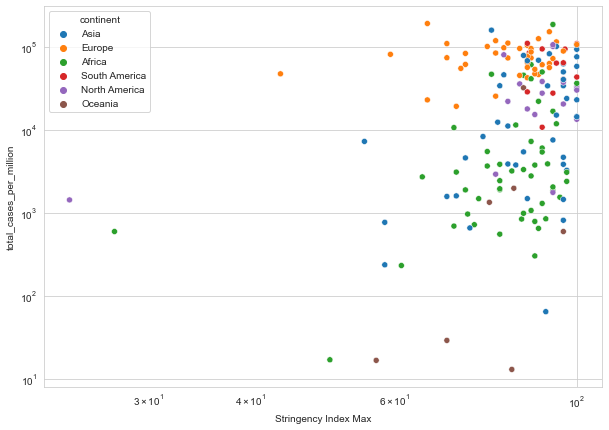

In [109]:
fig = plt.figure(figsize = (10,7))
ax = sns.scatterplot(data = df_str_final, x = 'Stringency Index Max', y = 'total_cases_per_million', hue = 'continent')
ax.set_xscale('log')
ax.set_yscale('log')

In [110]:
fig = go.Figure()

fig = px.scatter(df_str_final, x = 'Stringency Index Max', y = 'total_cases_per_million', trendline = 'ols', 
                 hover_name = 'location')
fig.update_layout( yaxis_type = 'log')
fig.update_layout( xaxis_type = 'log')

fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()


In [111]:
#perhaps we shld consider when each country reacted?

In [112]:
df_temp1 = df_str[['CountryName','StringencyIndex','Date']]
df_temp1

initial_df = df_temp1[df_temp1['CountryName'] == 'Aruba']
initial_df.dropna(inplace = True)
initial_df_new = initial_df[(initial_df != 0).all(1)]
initial_df_new 

,CountryName,StringencyIndex,Date
75,Aruba,11.11,20200316
76,Aruba,22.22,20200317
77,Aruba,33.33,20200318
78,Aruba,33.33,20200319
79,Aruba,33.33,20200320
...,...,...,...
547,Aruba,33.33,20210701
548,Aruba,33.33,20210702
549,Aruba,33.33,20210703
550,Aruba,33.33,20210704


In [113]:
#lets create a for loop that grabs the date at which each country first reacted
#initial df created for the same reason as starting df the first time we did this
initial_df = df_temp1[df_temp1['CountryName'] == 'Aruba']
initial_df.dropna(inplace = True)
initial_df_new = initial_df[(initial_df != 0).all(1)]
initial_df_new = initial_df_new[initial_df_new['Date'] == initial_df_new['Date'].min()]
#this last line chooses earliest date since the dates are given as integers


for country in stringency_countries:
    
    temp = df_temp1[df_temp1['CountryName'] == country]
    temp.dropna(inplace = True)
    temp_new = temp[(temp != 0).all(1)]
    temp_new = temp_new[temp_new['Date'] == temp_new['Date'].min()]
    
    initial_df_new = initial_df_new.append(temp_new)

In [114]:
initial_df_new

,CountryName,StringencyIndex,Date
75,Aruba,11.11,20200316
75,Aruba,11.11,20200316
631,Afghanistan,8.33,20200223
1192,Angola,5.56,20200206
1778,Albania,5.56,20200214
...,...,...,...
177506,Vanuatu,11.11,20200301
178098,Yemen,11.11,20200315
178624,South Africa,2.78,20200123
179231,Zambia,16.67,20200221


In [115]:
initial_df_new = initial_df_new.drop_duplicates()
initial_df_new.columns = 'location','Stringency Index', 'date'
initial_df_new.sort_values('location')
initial_df_ne bw.set_index('location', inplace = True)
initial_df_new
#here is our dataframe with earliest dates of response

,Stringency Index,date
location,,
Aruba,11.11,20200316
Afghanistan,8.33,20200223
Angola,5.56,20200206
Albania,5.56,20200214
Andorra,9.26,20200313
...,...,...
Vanuatu,11.11,20200301
Yemen,11.11,20200315
South Africa,2.78,20200123


In [116]:
#we can use the same method as before to align the countries with df_comp
#l is list of countries that don't exist in these countries ^ AND df comp

In [117]:
for item in l :
    if item in stringency_countries_ava:
        initial_df_new.drop(item, inplace = True)
    else:
        pass

In [133]:
initial_df_new.sort_values('location', inplace = True)

In [142]:
initial_df_new

,Stringency Index,date
location,,
Afghanistan,8.33,20200223
Albania,5.56,20200214
Algeria,5.56,20200305
Andorra,9.26,20200313
Angola,5.56,20200206
...,...,...
Venezuela,11.11,20200228
Vietnam,2.78,20200125
Yemen,11.11,20200315


In [119]:
df_comp_str  #we had this dataframe before

,continent,total_cases_per_million,total_deaths_per_million
location,,,
Afghanistan,Asia,3763.916,171.520
Albania,Europe,46228.369,853.777
Algeria,Africa,3881.071,96.212
Andorra,Europe,189969.585,1656.636
Angola,Africa,1297.561,30.670
...,...,...,...
Venezuela,South America,10716.226,125.756
Vietnam,Asia,1449.805,11.927
Yemen,Asia,236.639,46.101


In [156]:
initial_df_new = initial_df_new.loc[~initial_df_new.index.duplicated(keep='first')]

In [157]:
df_comp_str = df_comp_str.loc[~df_comp_str.duplicated(keep='first')]
#doing this to drop duplicates, otherwise concat wouldn't work

In [158]:
df_str_final_new = pd.concat([df_comp_str,initial_df_new], axis =1 )
df_str_final_new

,continent,total_cases_per_million,total_deaths_per_million,Stringency Index,date
location,,,,,
Afghanistan,Asia,3763.916,171.520,8.33,20200223
Albania,Europe,46228.369,853.777,5.56,20200214
Algeria,Africa,3881.071,96.212,5.56,20200305
Andorra,Europe,189969.585,1656.636,9.26,20200313
Angola,Africa,1297.561,30.670,5.56,20200206
...,...,...,...,...,...
Zambia,Africa,10612.297,183.638,16.67,20200221
Zimbabwe,Africa,7232.088,234.812,5.56,20200127
Bermuda,NaN,NaN,NaN,11.11,20200122


In [159]:
df_str_final_new.reset_index(inplace = True)

In [160]:
df_str_final_new['date'].max()

20200322

In [164]:
fig = plt.figure(figsize = (20,7))
fig = go.Figure()

fig = px.scatter(df_str_final_new, x = 'date', y = 'total_cases_per_million', trendline = 'ols', 
                 hover_name = df_str_final_new.index, size = 'Stringency Index')
fig.update_layout( yaxis_type = 'log')
fig.update_layout( xaxis_type = 'log')
   
fig.update_layout(    
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(20200101,20200322, 5 )
        
    )
)

fig.update_layout(
    width = 1000,
    height = 600
    )
fig.show()


<Figure size 1440x504 with 0 Axes>

In [ ]:
#some conclusions and notes:
#IMPORTANT: note that the virus didn't hit all countries at the same time so perhaps this graph isn't as useful as the previous one
#also, we haven't taken into account the scale of the problem - e.g., was the country hit hard at first or few cases?


#that said, one interesting observation is that countries that reacted later reacted with stricter restrictions- 
#perhaps they felt they were too late and had to keep up.
#but the cases per million still range across big range of values regardless of date. suggestsother aforementioned factors
#are greater

In [165]:
df_PRIME = df_comp[['location','iso_code','total_cases_per_million']].sort_values('location')

In [166]:
data1 = dict(type = 'choropleth',
            locations = df_PRIME['iso_code'],
            text = df_PRIME['location'],
            
            z=df_PRIME['total_cases_per_million'],
            colorbar = {'title':'total cases per milion'})

In [167]:
layout1 = dict(title = 'total cases per million',
              geo = dict(showframe = False,
              projection = {'type':'aitoff'}))

#favourite projections:


#hammer,
#mercator,
#orthographic
#natural earth
#aitoff


In [168]:
choromap_prime = go.Figure(data = [data1],layout = layout1)

In [169]:
iplot(choromap_prime)

In [ ]:
#interactive summary graphs for a bit of fun!

In [170]:
df_PRIME1 = df_PRIME = df_comp[['location','iso_code','new_cases_per_million']].sort_values('location')

In [171]:
data2 = dict(type = 'choropleth',
            locations = df_PRIME['iso_code'],
            text = df_PRIME['location'],
            colorscale= 'Blackbody',
            z=df_PRIME['new_cases_per_million'],
            colorbar = {'title':'new cases per milion'})

In [172]:
layout2 = dict(title = 'new cases per million',
              geo = dict(showframe = False,
              projection = {'type':'aitoff'}))

#favourite projections:


#hammer,
#mercator,
#orthographic
#natural earth
#aitoff

In [173]:
choromap_prime1 = go.Figure(data = [data2],layout = layout2)

In [174]:
iplot(choromap_prime1)